## Python foundation case study 2 - Credit card case study

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [116]:
customer_acquisition = pd.read_csv("Customer Acqusition.csv")
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [117]:
customer_acquisition.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [118]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [119]:
customer_acquisition.drop(columns = 'No', inplace = True)

In [120]:
customer_acquisition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [121]:
spend = pd.read_csv("spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [122]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [123]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [124]:
spend.drop(columns = 'Sl No:', inplace = True)

In [125]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [126]:
repayment = pd.read_csv("Repayment.csv")
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [127]:
repayment.drop(columns = ['Unnamed: 4', 'SL No:'] , inplace = True)

In [128]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [129]:
repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [130]:
repayment.dropna(axis = 0, inplace = True)

In [131]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [132]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [133]:
customer_acquisition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [134]:
customer_acquisition.loc[customer_acquisition.Age < 18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [135]:
customer_acquisition.Age.mean()

46.49

In [136]:
customer_acquisition['Age'] = np.where(customer_acquisition.Age < 18 , customer_acquisition.Age.mean(), customer_acquisition.Age)

In [137]:
customer_acquisition.iloc[[13,40,62,67,69,89]]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,46.49,COCHIN,Platimum,500000.0,C23,Govt
62,A63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,46.49,COCHIN,Gold,500000.0,C13,Govt


In [138]:
customer_acquisition.Age.mean()

48.399399999999986

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [139]:
customer_spend = pd.merge(left = customer_acquisition, right = spend, how = 'inner')
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [140]:
customer_spend.loc[customer_spend.Amount > customer_spend.Limit, ['Customer','Limit', 'Amount']]

,Customer,Limit,Amount
18,A2,100000.0,199554.72
19,A2,100000.0,376887.49
20,A2,100000.0,439648.53
21,A2,100000.0,384078.73
22,A2,100000.0,117089.16
...,...,...,...
1486,A87,100003.0,483886.62
1496,A97,10000.0,139018.26
1497,A98,10001.0,284521.06
1498,A99,10002.0,90184.22


In [141]:
customer_spend['Amount'] = np.where(customer_spend.Amount > customer_spend.Limit, customer_spend.Limit/2,customer_spend.Amount)

In [142]:
customer_spend.loc[customer_spend.Amount > customer_spend.Limit, ['Customer','Limit', 'Amount']]

,Customer,Limit,Amount


In [143]:
customer_spend.iloc[[18,19,20,21,22]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,50000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,50000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,50000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,50000.0
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,50000.0


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [144]:
customer_repay = pd.merge(left = customer_acquisition, right = repayment, how = 'inner')
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [145]:
customer_repay.loc[customer_repay.Amount > customer_repay.Limit, ['Customer','Limit', 'Amount']]

,Customer,Limit,Amount
18,A2,100000.0,185955.07
19,A2,100000.0,412783.34
20,A2,100000.0,148038.67
21,A2,100000.0,179144.68
23,A2,100000.0,381635.66
...,...,...,...
1486,A87,100003.0,462283.02
1495,A96,100000.0,310992.30
1496,A97,10000.0,121874.90
1497,A98,10001.0,337815.57


In [146]:
customer_repay['Amount'] = np.where(customer_repay.Amount > customer_repay.Limit, customer_repay.Limit,customer_repay.Amount)

In [147]:
customer_repay.loc[customer_repay.Amount > customer_repay.Limit, ['Customer','Limit', 'Amount']]

,Customer,Limit,Amount


In [148]:
customer_repay.iloc[[18,19,20,21,23]]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,100000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,100000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,100000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,100000.0
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,100000.0


## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [149]:
customer_acquisition.Customer.nunique()

100

### b. How many distinct categories exist?

In [150]:
customer_acquisition.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [151]:
customer_acquisition.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

### c. What is the average monthly spend by customers?

In [152]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [153]:
spend['Month'] = pd.to_datetime(spend.Month, format = '%d-%b-%y')

In [154]:
spend['Month_name'] = spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
spend['Year_name'] = spend.Month.apply(lambda x: pd.Timestamp.strftime(x, format = "%Y"))

In [155]:
spend.head()

,Customer,Month,Type,Amount,Month_name,Year_name
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [156]:
avg_monthly_spend = spend.groupby(['Customer','Year_name','Month_name'])[['Amount']].mean().round(2)
avg_monthly_spend.head()

Amount
Customer Year_name Month_name           
A1       2004      February     52208.65
                   January     373274.01
                   May         361141.31
         2005      August      344372.10
                   February    205992.45

### d. What is the average monthly repayment by customers?

In [157]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [158]:
repayment['Month'] = pd.to_datetime(repayment.Month, format = '%d-%b-%y')

In [159]:
repayment['Month_name'] = repayment.Month.apply(lambda x : pd.Timestamp.strftime(x, format = '%B'))
repayment['Year_name'] = repayment.Month.apply(lambda x: pd.Timestamp.strftime(x, format = "%Y"))

In [160]:
repayment.head()

,Customer,Month,Amount,Month_name,Year_name
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [161]:
avg_monthly_repay = repayment.groupby(['Customer','Year_name', 'Month_name'])[['Amount']].mean().round(2)
avg_monthly_repay.head()

Amount
Customer Year_name Month_name           
A1       2004      February    117964.43
                   January     373638.90
         2005      February    165977.34
                   January     165972.88
                   July        297176.74

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [162]:
profit = pd.merge(left = avg_monthly_spend, right = avg_monthly_repay, left_on = ['Customer','Year_name','Month_name'], right_on = ['Customer','Year_name','Month_name'] , how = 'inner')

In [163]:
profit.rename(columns = {'Amount_x' : 'spend_amount', 'Amount_y' : 'repay_amount'}, inplace = True)

In [164]:
profit.rename(columns = {'Amount_x' : 'repay_amount', 'Amount_y' : 'spend_amount'}, inplace = True)

In [165]:
profit.head()

spend_amount  repay_amount
Customer Year_name Month_name                            
A1       2004      February        52208.65     117964.43
                   January        373274.01     373638.90
         2005      February       205992.45     165977.34
                   January        369694.07     165972.88
                   November       183839.61     402099.78

In [166]:
profit['Monthly_profit'] = profit.repay_amount - profit.spend_amount

In [167]:
profit.head()

spend_amount  repay_amount  Monthly_profit
Customer Year_name Month_name                                            
A1       2004      February        52208.65     117964.43        65755.78
                   January        373274.01     373638.90          364.89
         2005      February       205992.45     165977.34       -40015.11
                   January        369694.07     165972.88      -203721.19
                   November       183839.61     402099.78       218260.17

In [168]:
profit['Actual_profit'] = np.where(profit.Monthly_profit > 0, profit.Monthly_profit * 2.9 / 100, np.NaN)

In [169]:
profit.head(30)

spend_amount  repay_amount  Monthly_profit  \
Customer Year_name Month_name                                               
A1       2004      February        52208.65     117964.43        65755.78   
                   January        373274.01     373638.90          364.89   
         2005      February       205992.45     165977.34       -40015.11   
                   January        369694.07     165972.88      -203721.19   
                   November       183839.61     402099.78       218260.17   
         2006      April          261649.25     254474.58        -7174.67   
A10      2004      January        161144.33     293429.97       132285.64   
                   March           47866.78      11900.61       -35966.17   
         2005      February       194557.67     217344.50        22786.83   
                   May            253408.29     126796.31      -126611.98   
         2006      April          270721.68     237812.76       -32908.92   
                   July           239798.03     358194.65       118396.62   
                   March          178013.51     354245.51       176232.00   
                   May             10615.48      14301.86         3686.38   
A100     2004      January        224786.88      69551.19      -155235.69   
A11      2004      January        130298.90     319518.80       189219.90   
         2005      August         404113.85     332677.61       -71436.24   
                   February       310743.02     267447.32       -43295.70   
                   May            179462.61     321502.00       142039.39   
         2006      March          177102.15     254319.01        77216.86   
                   May            468501.45     355659.14      -112842.31   
A12      2004      February       214891.01     412914.78       198023.77   
                   January        367429.96     241401.44      -126028.52   
                   September      479627.87     289407.01      -190220.86   
         2005      April          253078.21     171574.18       -81504.03   
                   February       168148.04     313040.56       144892.52   
                   January        296796.30      13379.96      -283416.34   
                   June           227499.34     450664.18       223164.84   
                   May            305626.75     185432.00      -120194.75   
         2006      July            77725.32     400642.98       322917.66   

                               Actual_profit  
Customer Year_name Month_name                 
A1       2004      February       1906.91762  
                   January          10.58181  
         2005      February              NaN  
                   January               NaN  
                   November       6329.54493  
         2006      April                 NaN  
A10      2004      January        3836.28356  
                   March                 NaN  
         2005      February        660.81807  
                   May                   NaN  
         2006      April                 NaN  
                   July           3433.50198  
                   March          5110.72800  
                   May             106.90502  
A100     2004      January               NaN  
A11      2004      January        5487.37710  
         2005      August                NaN  
                   February              NaN  
                   May            4119.14231  
         2006      March          2239.28894  
                   May                   NaN  
A12      2004      February       5742.68933  
                   January               NaN  
                   September             NaN  
         2005      April                 NaN  
                   February       4201.88308  
                   January               NaN  
                   June           6471.78036  
                   May                   NaN  
         2006      July           9364.61214

### f. What are the top 5 product types?

In [173]:
top_5 = customer_spend.groupby('Type')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head()
top_5

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


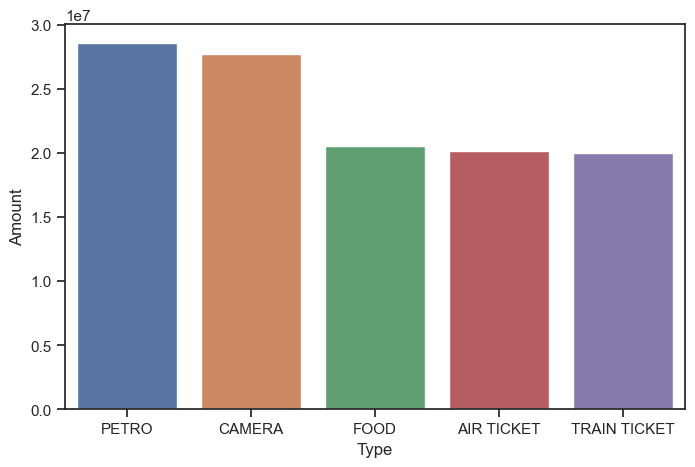

In [174]:
plt.figure(figsize=(8, 5))
sns.barplot(x = top_5.index, y = top_5.Amount)
plt.show()

### g. Which city is having maximum spend?

In [175]:
customer_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(1)

,Amount
City,
COCHIN,45963513.5


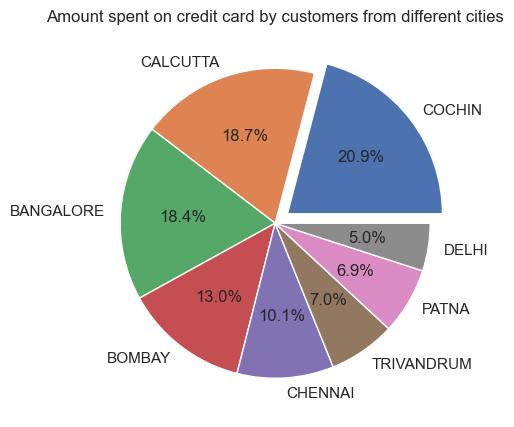

In [202]:
city_spend = customer_spend.groupby('City')[['Amount']].sum().sort_values(by = 'Amount', ascending = False)
plt.figure(figsize=(5,10))
plt.pie(city_spend.Amount, labels = city_spend.index, autopct='%1.1f%%', explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

### h. Which age group is spending more money?

In [177]:
customer_spend.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00
1499,A100,36.0,COCHIN,Silver,100000.0,C5,Salaried_MNC,25-Jan-04,BUS TICKET,50000.00


In [179]:
customer_spend.Age.min()

19.0

In [180]:
customer_spend.Age.max()

79.0

In [185]:
customer_spend['Age_group'] = pd.cut(customer_spend.Age , [18,30,40,50,60,70,80], labels = ['18-30', '31-40', '41-50','51-60','61-70','71-80'])

In [204]:
customer_spend.groupby('Age_group')[['Amount']].sum().sort_values('Amount', ascending = False).head(1)

,Amount
Age_group,
41-50,57048361.87


### i. Who are the top 10 customers in terms of repayment?

In [205]:
customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [206]:
customer_repay.groupby('Customer')[['Amount']].sum().sort_values('Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [216]:
customer_spend['Year_name'] = customer_spend.Month.apply(lambda x: pd.Timestamp.strftime(pd.to_datetime(x, format = '%d-%b-%y'), format = "%Y"))

In [220]:
city_wise_spend = customer_spend.pivot_table(index = ['City'], columns = ['Product', 'Year_name'], values = 'Amount', aggfunc = 'sum')
city_wise_spend

Product           Gold                              Platimum              \
Year_name         2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year_name         2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

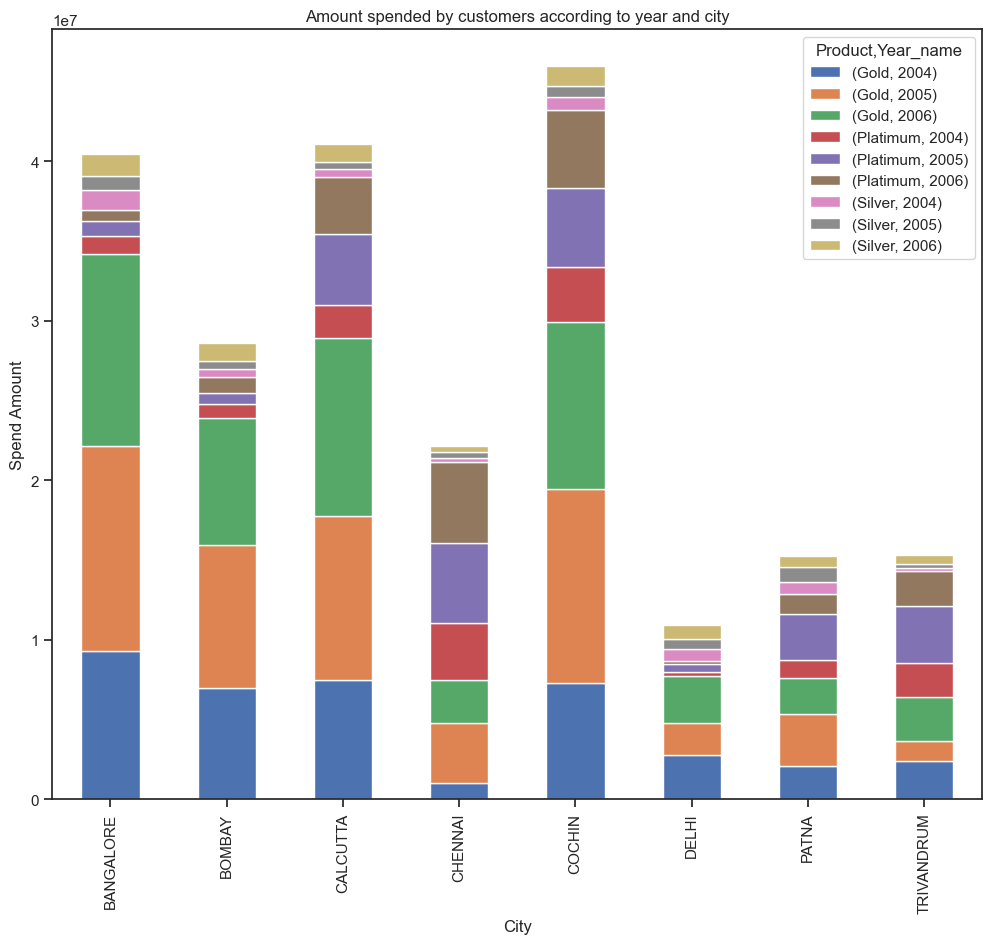

In [229]:
city_wise_spend.plot(kind = 'bar', stacked = True, figsize = (12,10))
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [230]:
customer_spend['Month_name'] = customer_spend.Month.apply(lambda x: pd.Timestamp.strftime(pd.to_datetime(x, format = '%d-%b-%y'), format = "%B"))

In [231]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_group,Year_name,Month_name
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,71-80,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,71-80,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,71-80,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,71-80,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,71-80,2005,January


In [232]:
monthly_spend = customer_spend.pivot_table(index = ['City'], columns = ['Month_name'], values = 'Amount', aggfunc = 'sum')
monthly_spend

Month_name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


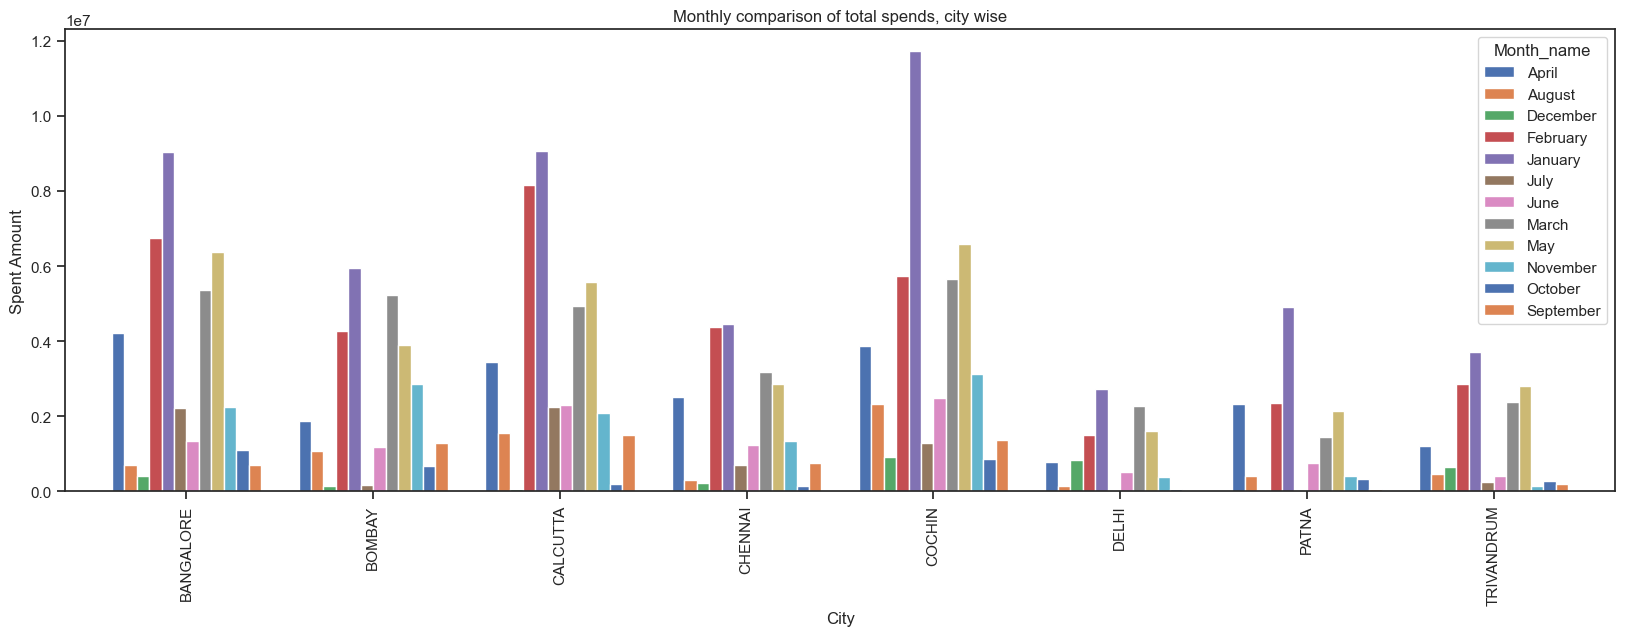

In [249]:
monthly_spend.plot(kind = 'bar', figsize = (20,6), width = 0.8)
plt.ylabel("Spent Amount")
plt.title("Monthly comparison of total spends, city wise")
plt.show()

### b. Comparison of yearly spend on air tickets

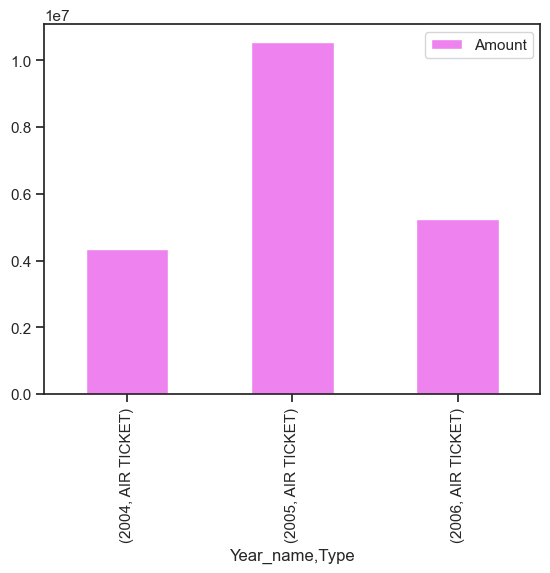

In [259]:
customer_spend.loc[customer_spend.Type == 'AIR TICKET'].groupby(['Year_name', 'Type'])[['Amount']].sum().plot(kind = 'bar', color = 'violet')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

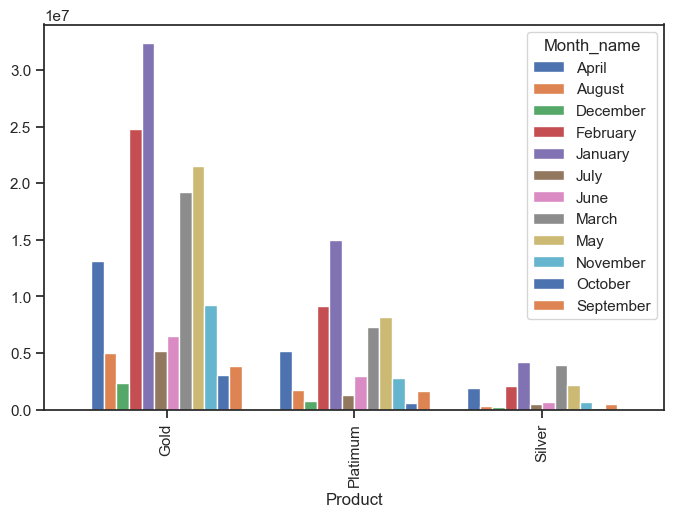

In [267]:
monthly_spend_prod = customer_spend.pivot_table(index = ['Product'], columns = ['Month_name'], values = 'Amount', aggfunc = 'sum')
monthly_spend_prod.plot(kind = 'bar', figsize = (8,5), width = 0.8)
plt.show()

## All the three products have highest sale in the month of January.

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [268]:
repayment.head()

,Customer,Month,Amount,Month_name,Year_name
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [269]:
data1 = pd.merge(left = customer_acquisition, right = repayment, on = 'Customer', how = 'inner')

In [276]:
data1.rename(columns = {'Month_name' : 'monthly', 'Year_name' : 'yearly'}, inplace = True)

In [303]:
data1.Product = np.where(data1.Product == 'Platimum', 'Platinum', data1.Product)
data1.Product.value_counts()

Gold        610
Platinum    570
Silver      320
Name: Product, dtype: int64

In [318]:
def top_ten_customer(product, time_period):
    return data1.loc[data1.Product == product].groupby(['Customer','City','Product', time_period])[['Amount']].sum().sort_values('Amount',ascending = False).head(10)

In [319]:
product = str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period = str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [320]:
top_10 = top_ten_customer(product, time_period)

In [321]:
top_10

,,,,Amount
Customer,City,Product,yearly,
A22,BOMBAY,Silver,2004,3455774.79
A46,PATNA,Silver,2005,3415340.60
A22,BOMBAY,Silver,2005,3395983.42
A25,COCHIN,Silver,2006,3231059.43
A24,DELHI,Silver,2005,3044224.68
A57,TRIVANDRUM,Silver,2004,2732428.36
A23,BANGALORE,Silver,2005,2631279.96
A46,PATNA,Silver,2006,2573969.61
A8,PATNA,Silver,2004,2573830.15
